In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

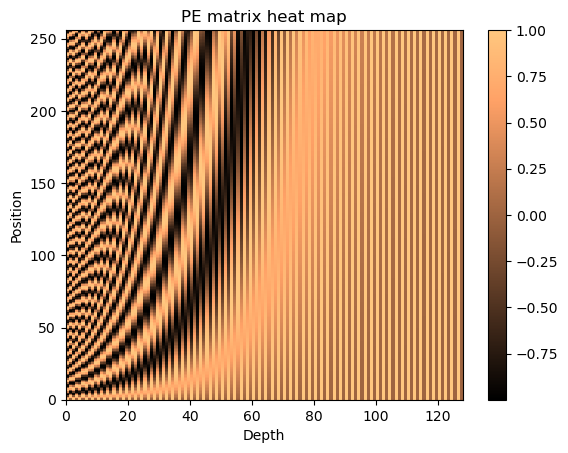

In [6]:

#### TensorFlow only version ####
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = tf.range(max_position, dtype=tf.float32)
    mask = tf.range(d_model)
    sin_mask = tf.cast(mask%2, tf.float32)
    cos_mask = 1-sin_mask
    exponent = 2*(mask//2)
    exponent = tf.cast(exponent, tf.float32)/tf.cast(d_model, tf.float32)
    freqs = min_freq**exponent
    angles = tf.einsum('i,j->ij', position, freqs)
    pos_enc = tf.math.cos(angles)*cos_mask + tf.math.sin(angles)*sin_mask
    return pos_enc

#### Numpy version ####
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc
    
### Plotting ####
d_model = 128
max_pos = 256
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()